In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
from sklearn import preprocessing


%matplotlib inline


PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.
Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


In [2]:
df_ori = pd.read_csv('./data/train.csv')

In [3]:
data = df_ori.copy()

In [4]:
data.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
data.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [8]:
data[[x for x in data.columns if data[x].dtype == 'O']]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre


### Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [9]:
data['Cabin'].nunique()

6560

In [10]:
data['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [11]:
def cabin_deck(x):
    if type(x) == str:
        return x.split('/')[0]
    else:
        return 'Unknown'
    
def cabin_num(x):
    if type(x) == str:
        return int(x.split('/')[1])
    else:
        return -1
    
def cabin_port(x):
    if type(x) == str:
        x = x.split('/')[2]
        if x == 'P':
            return 1
        elif x == 'S':
            return 0
        else:
            return -1
    else:
        return -1
    
def cryoSleep(x):
    if x == True:
        return 1
    elif x == False:
        return 0
    else:
        return -1
    
    
def homeplanet(planet):
    if planet == "Earth":
        return 1
    elif planet == "Europa":
        return 2
    elif planet == "Mars":
        return 3
    else: 
        return 0
    
def Destination(x):
    if x == 'TRAPPIST-1e':
        return 0
    elif x == 'PSO J318.5-22':
        return 1
    elif x == '55 Cancri e':
        return 2
    else:
        return -1
        
    

In [70]:
label_encoder = preprocessing.LabelEncoder()
drop_cols = 'HomePlanet CryoSleep Cabin Destination Name Cabin_deck'.split()

def convert_data(data):
    data['Cabin_deck'] = data['Cabin'].apply(cabin_deck)
    data['i_Cabin_deck'] = label_encoder.fit_transform(data['Cabin_deck'])
    data['i_Cabin_num'] = data['Cabin'].apply(cabin_num)
    data['is_Cabin_port'] = data['Cabin'].apply(cabin_port)
    data['i_HomePlanet'] = data['HomePlanet'].apply(homeplanet)
    data['isVIP'] = data['VIP'].apply(lambda x: 1 if x == True else 0)
    data['iDestination'] = data['Destination'].apply(Destination)
    data['isCryoSleep'] = data['CryoSleep'].apply(cryoSleep)
    data.drop(drop_cols,axis=1,inplace=True)
    
    return data

In [13]:
data['Cabin_deck'] = data['Cabin'].apply(cabin_deck)

In [14]:
data['Cabin_deck'].unique()

array(['B', 'F', 'A', 'G', 'Unknown', 'E', 'D', 'C', 'T'], dtype=object)

In [15]:
label_encoder = preprocessing.LabelEncoder()
data['i_Cabin_deck'] = label_encoder.fit_transform(data['Cabin_deck'])

In [16]:
data['Cabin_num'] = data['Cabin'].apply(cabin_num)

In [17]:
data['Cabin_num'].unique()

array([   0,    1,    2, ..., 1892, 1893, 1894])

In [18]:
data['is_port'] = data['Cabin'].apply(cabin_port)

In [19]:
data['is_port'].unique()

array([ 1,  0, -1])

In [20]:
data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,i_Cabin_deck,Cabin_num,is_port
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,1,0,1


In [21]:
data['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [22]:
data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

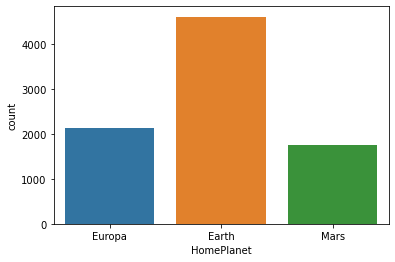

In [23]:
sns.countplot(data=data,x='HomePlanet')

In [24]:
data['i_HomePlanet'] = data['HomePlanet'].apply(homeplanet)

In [25]:
data['i_HomePlanet'].value_counts()

1    4602
2    2131
3    1759
0     201
Name: i_HomePlanet, dtype: int64

In [26]:
data['CryoSleep'].unique()

array([False, True, nan], dtype=object)

In [27]:
data['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [28]:
data['isCryoSleep'] = data['CryoSleep'].apply(cryoSleep)

In [29]:
data[data['isCryoSleep'] == -1].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,i_Cabin_deck,Cabin_num,is_port,i_HomePlanet,isCryoSleep
count,216.000000,215.000000,214.000000,209.000000,212.000000,210.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,27.921296,218.413953,460.920561,145.995215,277.641509,295.142857,4.405530,587.262673,0.488479,1.654378,-1.0
std,14.817912,729.552827,1435.890781,370.079039,877.796289,1079.629716,1.893353,512.198945,0.561995,0.802422,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.0
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,162.000000,0.000000,1.000000,-1.0
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,410.000000,1.000000,1.000000,-1.0
75%,37.000000,38.000000,79.750000,5.000000,28.250000,18.000000,6.000000,995.000000,1.000000,2.000000,-1.0
max,73.000000,8243.000000,16263.000000,2179.000000,6075.000000,9811.000000,8.000000,1893.000000,1.000000,3.000000,-1.0


In [30]:
data['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [31]:
data['iDestination'] = data['Destination'].apply(Destination)

In [32]:
data['isVIP'] = data['VIP'].apply(lambda x: 1 if x == True else 0)

In [33]:
data['isTransported'] = data['Transported'].apply(lambda x: 1 if x == True else 0)

In [34]:
data.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,Cabin_deck,i_Cabin_deck,Cabin_num,is_port,i_HomePlanet,isCryoSleep,iDestination,isVIP,isTransported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,B,1,0,1,2,0,0,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,F,5,0,0,1,0,0,0,1


In [35]:
lst_lname = []
for i in list(data['Name'].unique()):
    if type(i) != float:
        lst_lname.append(i.split()[1])

In [36]:
set_lname = set()
for i in list(data['Name'].unique()):
    if type(i) != float:
        set_lname.add(i.split()[1])

In [37]:
print(len(lst_lname),len(set_lname))

8473 2217


In [38]:
set_lname

{'Mcculley',
 'Talls',
 'Nane',
 'Nacke',
 'Steary',
 'Dectory',
 'Colomonson',
 'Semootor',
 'Sernator',
 'Inghting',
 'Sancockett',
 'Hinesh',
 'Jacostarks',
 'Embleng',
 'Stelative',
 'Booness',
 'Rodwative',
 'Sancasey',
 'Hoppers',
 'Leonaldez',
 'Forne',
 'Wiggson',
 'Sche',
 'Melto',
 'Asivetfuel',
 'Sotond',
 'Lake',
 'Cabrewsond',
 'Nichaner',
 'Raste',
 'Quelfly',
 'Gallard',
 'Derte',
 'Combson',
 'Conleydenan',
 'Youngrayes',
 'Fringearty',
 'Nake',
 'Beckerson',
 'Wallerson',
 'Ightive',
 'Muste',
 'Skessid',
 'Garden',
 'Maldon',
 'Unaasor',
 'Bart',
 'Graie',
 'Mcdowns',
 'Ple',
 'Rocketedy',
 'Ageurante',
 'Hultz',
 'Tersimpson',
 'Panspic',
 'Scoudelle',
 'Saley',
 'Welles',
 'Freptic',
 'Phillis',
 'Dinger',
 'Ruity',
 'Monsintic',
 'Sweene',
 'Newtontoss',
 'Sulie',
 'Wriggins',
 'Barmant',
 'Swingse',
 'Bushafford',
 'Dynatic',
 'Haste',
 'Axlentindy',
 'Breke',
 'Invebodene',
 'Baketton',
 'Tairbatic',
 'Johnsondez',
 'Donson',
 'Mone',
 'Leonzaley',
 'Hestes',
 'I

In [39]:
null_cols = {}
for col in data.columns:
    null_cols[col] = {'total' : data[col].isnull().sum(), 'percentage':  data[col].isnull().sum()/len(data)}
    
    
list(null_cols.items())

[('PassengerId', {'total': 0, 'percentage': 0.0}),
 ('HomePlanet', {'total': 201, 'percentage': 0.023122052225928908}),
 ('CryoSleep', {'total': 217, 'percentage': 0.02496261359714713}),
 ('Cabin', {'total': 199, 'percentage': 0.02289198205452663}),
 ('Destination', {'total': 182, 'percentage': 0.02093638559760727}),
 ('Age', {'total': 179, 'percentage': 0.020591280340503854}),
 ('VIP', {'total': 203, 'percentage': 0.023352122397331185}),
 ('RoomService', {'total': 181, 'percentage': 0.02082135051190613}),
 ('FoodCourt', {'total': 183, 'percentage': 0.021051420683308408}),
 ('ShoppingMall', {'total': 208, 'percentage': 0.02392729782583688}),
 ('Spa', {'total': 183, 'percentage': 0.021051420683308408}),
 ('VRDeck', {'total': 188, 'percentage': 0.021626596111814105}),
 ('Name', {'total': 200, 'percentage': 0.023007017140227768}),
 ('Transported', {'total': 0, 'percentage': 0.0}),
 ('Cabin_deck', {'total': 0, 'percentage': 0.0}),
 ('i_Cabin_deck', {'total': 0, 'percentage': 0.0}),
 ('Cabi

In [40]:
data['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

<AxesSubplot:xlabel='Transported', ylabel='count'>

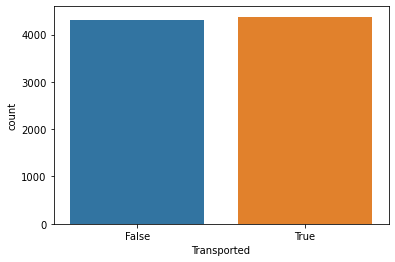

In [41]:
sns.countplot(data=data,x='Transported')

<AxesSubplot:>

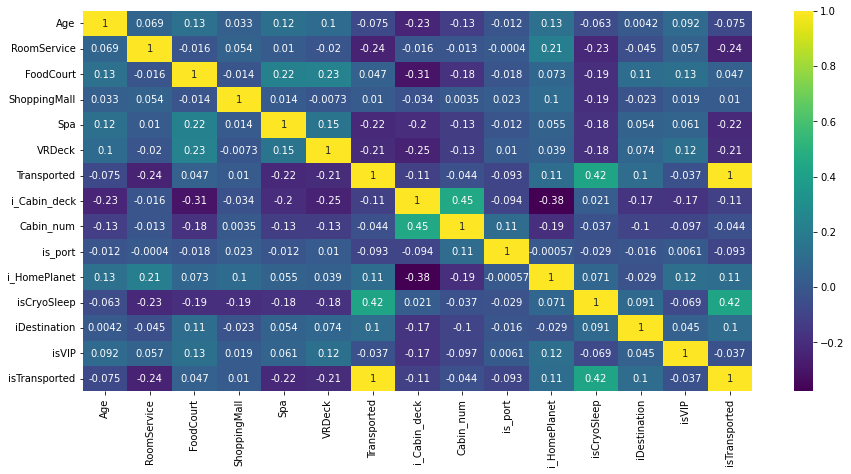

In [42]:
plt.figure(figsize=(15,7))
sns.heatmap(data=data.corr(), annot=True, cmap='viridis')

In [43]:
df2 = convert_data(df_ori.copy())

In [44]:
df2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,Cabin_deck,i_Cabin_deck,i_Cabin_num,is_Cabin_port,i_HomePlanet,isVIP,iDestination,isCryoSleep
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,False,B,1,0,1,2,0,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Juanna Vines,True,F,5,0,0,1,0,0,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Altark Susent,False,A,0,0,0,2,1,0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,Solam Susent,False,A,0,0,0,2,0,0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,Willy Santantines,True,F,5,1,0,1,0,0,0


In [45]:
df2.dtypes

PassengerId       object
HomePlanet        object
CryoSleep         object
Cabin             object
Destination       object
Age              float64
VIP               object
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
Name              object
Transported         bool
Cabin_deck        object
i_Cabin_deck       int64
i_Cabin_num        int64
is_Cabin_port      int64
i_HomePlanet       int64
isVIP              int64
iDestination       int64
isCryoSleep        int64
dtype: object

In [46]:
df2_num = df2[[x for x in df2.columns if df2[x].dtype != "O"]]

/var/folders/dk/37sbt0k53451bd1_l_nzws1h0000gn/T/ipykernel_59734/3627335300.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  for col in df2_num.drop('Transported',1).columns:


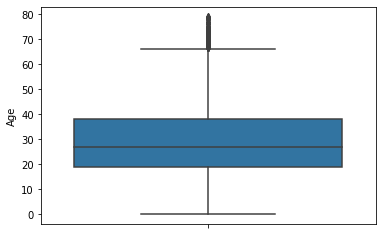

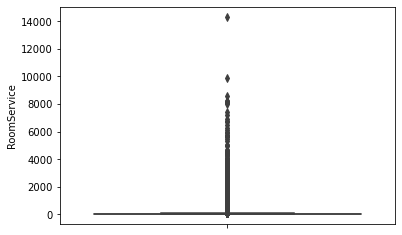

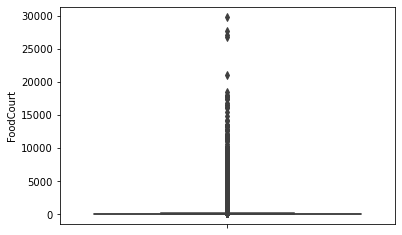

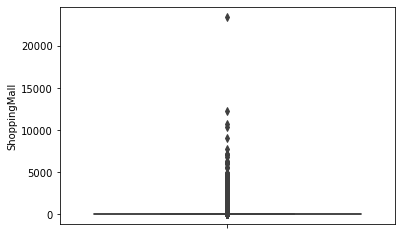

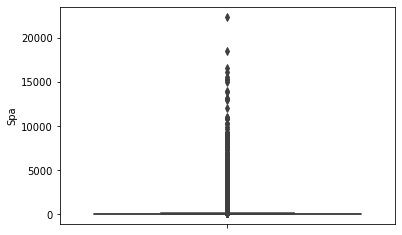

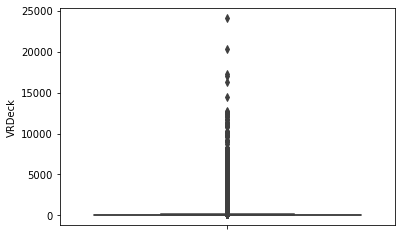

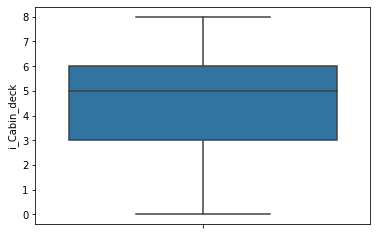

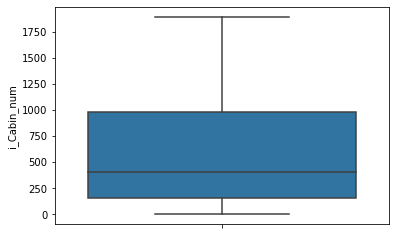

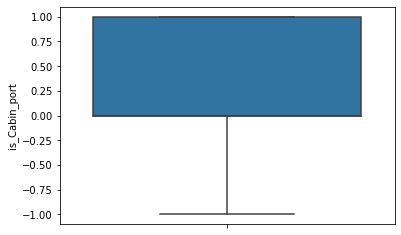

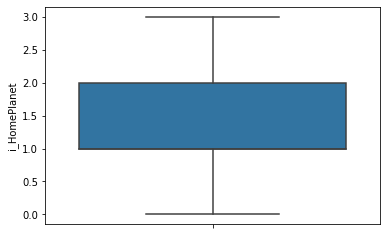

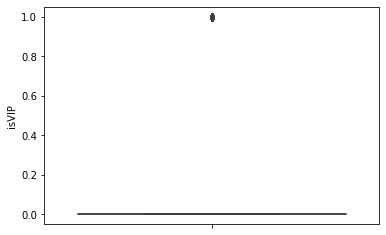

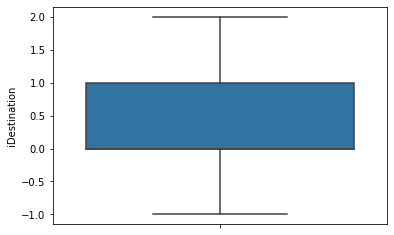

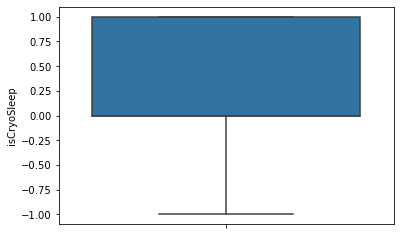

In [47]:
for col in df2_num.drop('Transported',1).columns:
    sns.boxplot(data=df2,y=col)
    plt.show()

In [48]:
df2_num

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,i_Cabin_deck,i_Cabin_num,is_Cabin_port,i_HomePlanet,isVIP,iDestination,isCryoSleep
0,39.0,0.0,0.0,0.0,0.0,0.0,False,1,0,1,2,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,5,0,0,1,0,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,0,0,2,1,0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,0,2,0,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,5,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,0,98,1,2,1,2,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,6,1499,0,1,0,1,1
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,6,1500,0,1,0,0,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,4,608,0,2,0,2,0


<AxesSubplot:xlabel='i_Cabin_deck', ylabel='count'>

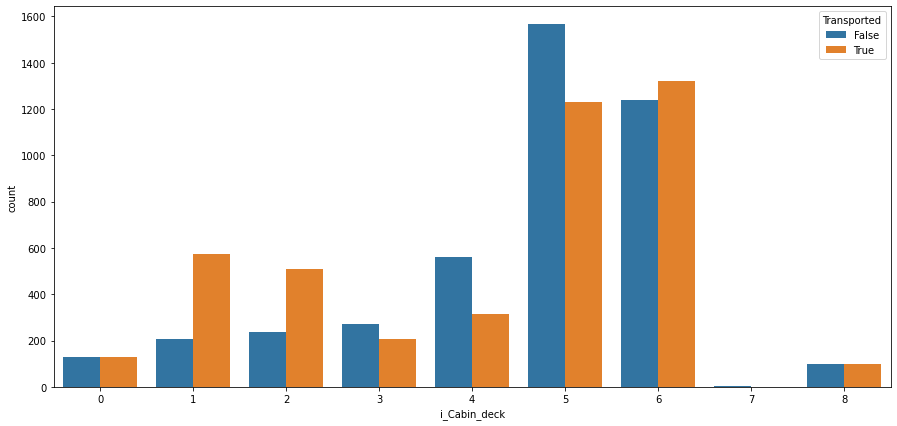

In [55]:
plt.figure(figsize=(15,7))
sns.countplot(data=df2_num,x='i_Cabin_deck',hue='Transported')

In [59]:
# plt.figure(figsize=(15,7))
# sns.countplot(data=df2_num,x='i_Cabin_num',hue='Transported')

<AxesSubplot:xlabel='is_Cabin_port', ylabel='count'>

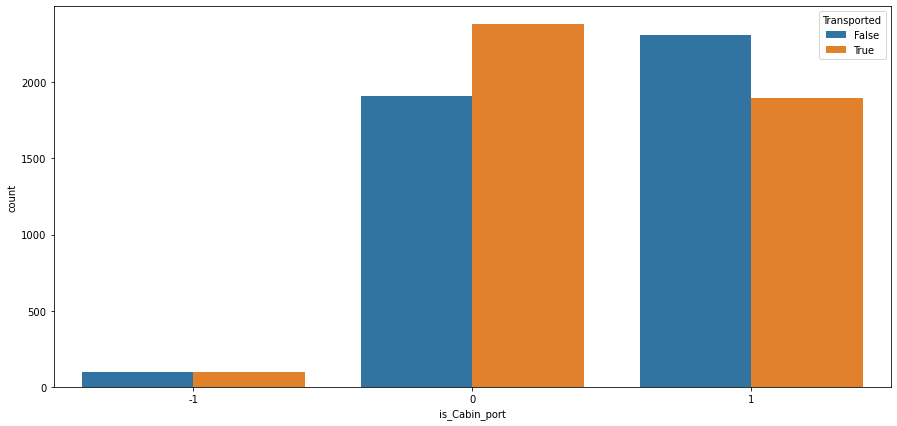

In [58]:
plt.figure(figsize=(15,7))
sns.countplot(data=df2_num,x='is_Cabin_port',hue='Transported')

when it comes to the cabin deck you can see the lower number deck 0-2, the number of transported seems to be slighly higher than number of not.

when it gets to cabin 3 the number of survivors depending on the cabin starts to switch so also has a lot more observations.

<AxesSubplot:xlabel='Age', ylabel='count'>

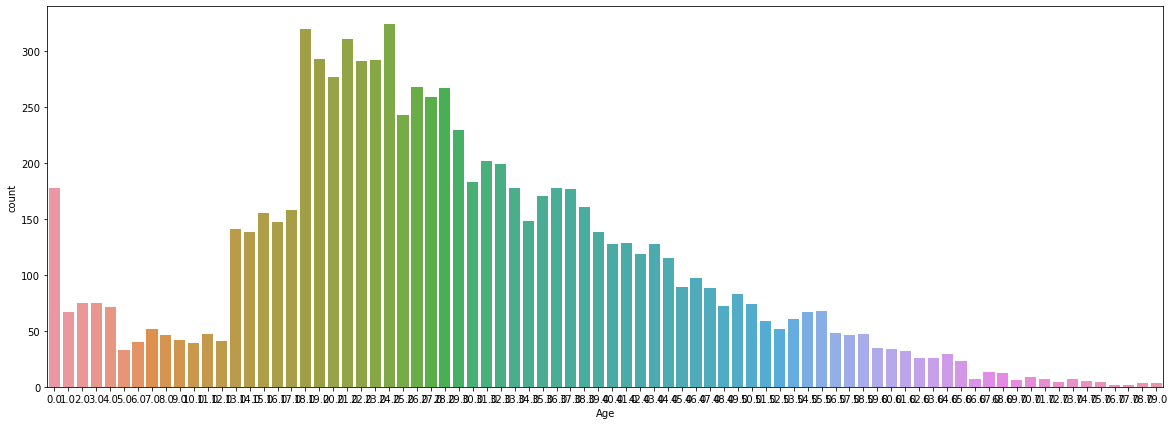

In [50]:
plt.figure(figsize=(20,7))
sns.countplot(data=df2_num,x='Age')

<AxesSubplot:xlabel='Age', ylabel='count'>

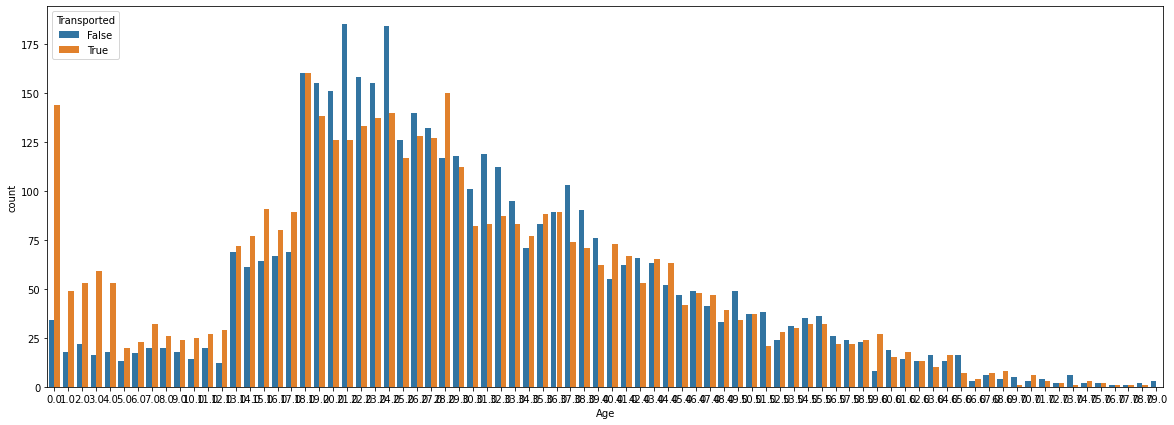

In [51]:
plt.figure(figsize=(20,7))
sns.countplot(data=df2_num,x='Age',hue='Transported')

<AxesSubplot:xlabel='isVIP', ylabel='count'>

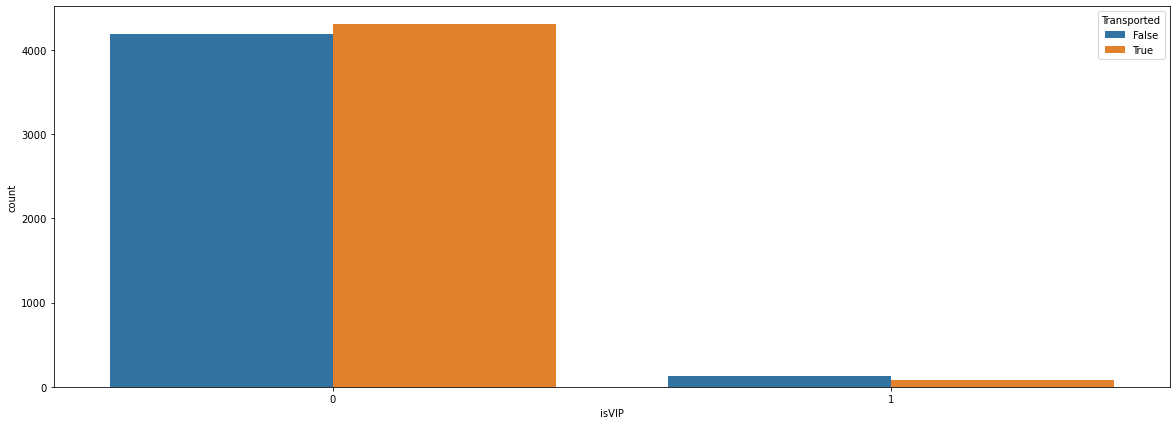

In [52]:
plt.figure(figsize=(20,7))
sns.countplot(data=df2_num,x='isVIP',hue='Transported')

<AxesSubplot:xlabel='isCryoSleep', ylabel='count'>

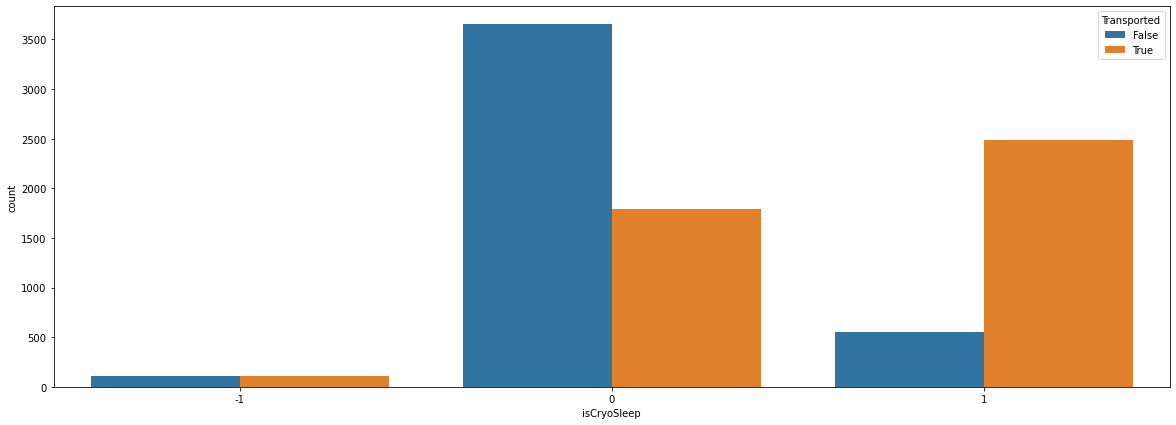

In [53]:
plt.figure(figsize=(20,7))
sns.countplot(data=df2_num,x='isCryoSleep',hue='Transported')

Using the graph above it looks like the travelers who was put on crysoSleep was more likely successfully Transported

In [61]:
df2_num.to_csv('data/train_norm',index=False)

In [63]:
test = pd.read_csv('data/test.csv')

In [62]:
pd.read_csv('data/train_norm')

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,i_Cabin_deck,i_Cabin_num,is_Cabin_port,i_HomePlanet,isVIP,iDestination,isCryoSleep
0,39.0,0.0,0.0,0.0,0.0,0.0,False,1,0,1,2,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,5,0,0,1,0,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,0,0,2,1,0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,0,2,0,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,5,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,0,98,1,2,1,2,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,6,1499,0,1,0,1,1
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,6,1500,0,1,0,0,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,4,608,0,2,0,2,0


In [71]:
test2 = convert_data(test)

In [68]:
drop_cols = 'HomePlanet CryoSleep Cabin Destination Name Cabin_deck'.split()

In [72]:
test2

,PassengerId,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,i_Cabin_deck,i_Cabin_num,is_Cabin_port,i_HomePlanet,isVIP,iDestination,isCryoSleep
0,0013_01,27.0,False,0.0,0.0,0.0,0.0,0.0,6,3,0,1,0,0,1
1,0018_01,19.0,False,0.0,9.0,0.0,2823.0,0.0,5,4,0,1,0,0,0
2,0019_01,31.0,False,0.0,0.0,0.0,0.0,0.0,2,0,0,2,0,2,1
3,0021_01,38.0,False,0.0,6652.0,0.0,181.0,585.0,2,1,0,2,0,0,0
4,0023_01,20.0,False,10.0,0.0,635.0,0.0,0.0,5,5,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,34.0,False,0.0,0.0,0.0,0.0,0.0,6,1496,0,1,0,0,1
4273,9269_01,42.0,False,0.0,847.0,17.0,10.0,144.0,8,-1,-1,1,0,0,0
4274,9271_01,NaN,False,0.0,0.0,0.0,0.0,0.0,3,296,1,3,0,2,1
4275,9273_01,NaN,False,0.0,2680.0,0.0,0.0,523.0,3,297,1,2,0,-1,0
